<a href="https://colab.research.google.com/github/shinjeongdong/MLDeeplearningStudy/blob/main/%5BPyTorch%5D/%5BPyTorch%5D_3_1_(nn_linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchviz
from torchviz import make_dot

In [ ]:
import torch

In [ ]:
from torch import nn

Linear(in_features=1, out_features=1, bias=True)
torch.Size([1, 1])
Parameter containing:
tensor([0.7079], requires_grad=True)
tensor([0.5861], grad_fn=<ViewBackward0>)
tensor([0.5861], grad_fn=<ViewBackward0>)


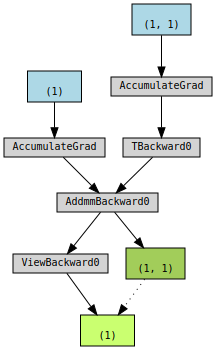

In [ ]:
x = torch.tensor([1.])
model = nn.Linear(1,1) #입력 노드 한 개, 출력 노드 한 개인 layer 만듦.
print(model)

print(model.weight) #만들면서 랜덤으로 이니셜라이즈 됨 requires_grad = True
print(model.bias)

y = model(x)
print(y)

y2 = x @ model.weight + model.bias
print(y)

make_dot(y)

Parameter containing:
tensor([[-0.1926],
        [ 0.4456],
        [ 0.6410]], requires_grad=True)
Parameter containing:
tensor([ 0.0607,  0.8096, -0.7268], requires_grad=True)
Parameter containing:
tensor([[0.5304, 0.0523, 0.1419]], requires_grad=True)
Parameter containing:
tensor([-0.4001], requires_grad=True)
tensor([-0.1319,  1.2551, -0.0858], grad_fn=<ViewBackward0>)
tensor([-0.4166], grad_fn=<ViewBackward0>)
tensor([-0.4166], grad_fn=<AddBackward0>)


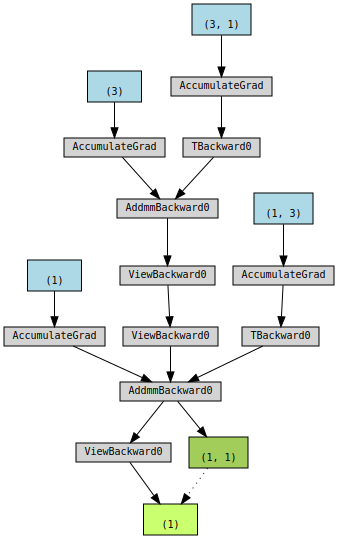

In [ ]:
fc1 = nn.Linear(1,3)
fc2 = nn.Linear(3,1)

print(fc1.weight)
print(fc1.bias)
print(fc2.weight)
print(fc2.bias)

x = torch.tensor([1.])
x = fc1(x)
print(x)
y = fc2(x)
print(y)

x = torch.tensor([1.])
y2 = (x @ fc1.weight.T + fc1.bias) @ fc2.weight.T + fc2.bias
print(y2)

make_dot(y)

tensor([-0.1642, -0.2174])
tensor([-0.1254,  0.1860,  0.4807], grad_fn=<ViewBackward0>)


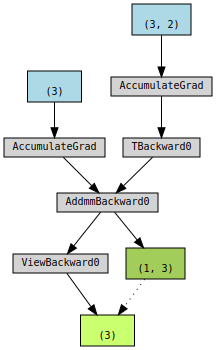

In [ ]:
model = nn.Linear(2,3)
x = torch.randn(2)
print(x)
print(model(x))
# nn.Linear는 데이터의 shape의 마지막 차원이 '채'로(1D 데이터)로 들어오길 기대하는 녀석
# (입력노드 하나가 곧 하나의 채널(피쳐) 값을 의미)
make_dot(model(x)) # 2개의 채널이 3개의 채널로 됨

tensor([[-1.2261, -2.1895],
        [ 0.2047, -1.2244],
        [-1.0342,  0.7877],
        [ 1.0494, -1.1059],
        [ 0.2039,  0.1021]])
tensor([[-1.6420,  0.2291,  0.4610],
        [-0.9646, -0.4478,  0.5343],
        [-0.7915, -0.3998, -0.3510],
        [-0.6851, -0.7622,  0.7079],
        [-0.6110, -0.6982,  0.1513]], grad_fn=<AddmmBackward0>)
torch.Size([4, 5, 3])


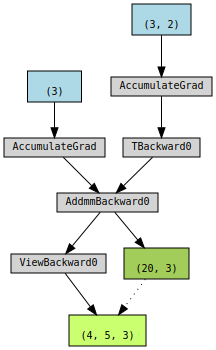

In [ ]:
model = nn.Linear(2,3)

x = torch.randn(5,2) #2개의 특징을 가지는 데이터 5개 ==> 3개의 특징을 가지는 노드가 5개

print(x)
print(model(x))

x = torch.randn(4,5,2) # 개x개x채
print(model(x).shape) #=> 4,5,3

make_dot(model(x))

tensor([ 1.0224, -0.5562,  0.2219], grad_fn=<ViewBackward0>)
tensor([0.7457], grad_fn=<ViewBackward0>)
tensor([0.7457], grad_fn=<ViewBackward0>)


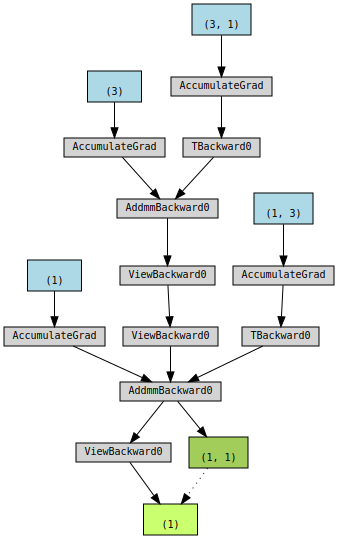

In [ ]:
fc1 = nn.Linear(1,3)
fc2 = nn.Linear(3,1)

x = torch.tensor([1.])
x = fc1(x)
print(x)
x = fc2(x)
print(x)

x = torch.tensor([1.])
model = nn.Sequential(fc1,fc2) # layer 풀칠
print(model(x))

make_dot(model(x))

In [ ]:
model = nn.Sequential(nn.Linear(2,5), # 2 -> 5, 5-> 10, 10 -> 3
                      nn.Linear(5,10),
                      nn.Linear(10,3))

x = torch.randn(5,2) #5,2 연산하면 shape5,3이됨

print(x)
print(model(x))

tensor([[ 1.3346, -0.6864],
        [-0.6240, -0.4488],
        [ 0.6127,  1.0290],
        [-1.9322, -0.6865],
        [ 1.6638, -0.1599]])
tensor([[ 0.4695, -0.3026, -0.2848],
        [ 0.3764, -0.3160,  0.0044],
        [ 0.3327, -0.2988, -0.1982],
        [ 0.3392, -0.3271,  0.2024],
        [ 0.4495, -0.2973, -0.3404]], grad_fn=<AddmmBackward0>)


tensor([[0.3950, 0.6093, 0.4977],
        [0.3932, 0.6114, 0.4931],
        [0.3925, 0.6092, 0.4988],
        [0.3951, 0.6085, 0.4994],
        [0.3900, 0.6115, 0.4943]], grad_fn=<SigmoidBackward0>)


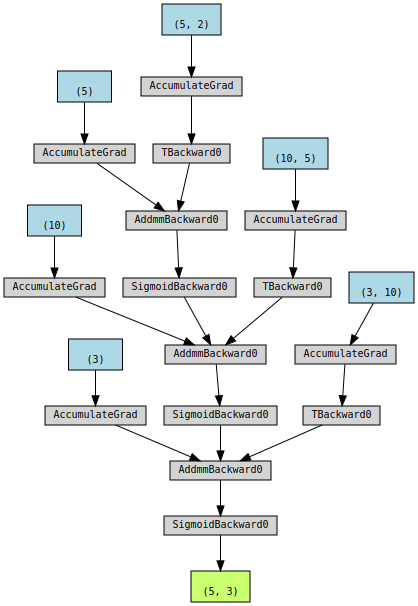

In [ ]:
#클래스로 모델 정의 예시
class Mymodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(2,5)
    self.fc2 = nn.Linear(5,10)
    self.fc3 = nn.Linear(10,3)
    self.act = nn.Sigmoid()
  def forward(self,x):
    x = self.fc1(x)
    x = self.act(x)
    x = self.fc2(x)
    x = self.act(x)
    x = self.fc3(x)
    x = self.act(x)
    return x

model = Mymodel()
x = torch.randn(5,2)
y = model(x) # model.forward(x)

print(y)

make_dot(model(x))

tensor([[0.4217, 0.5689, 0.5399],
        [0.4226, 0.5659, 0.5404],
        [0.4232, 0.5658, 0.5398],
        [0.4224, 0.5657, 0.5407],
        [0.4220, 0.5675, 0.5401]], grad_fn=<SigmoidBackward0>)


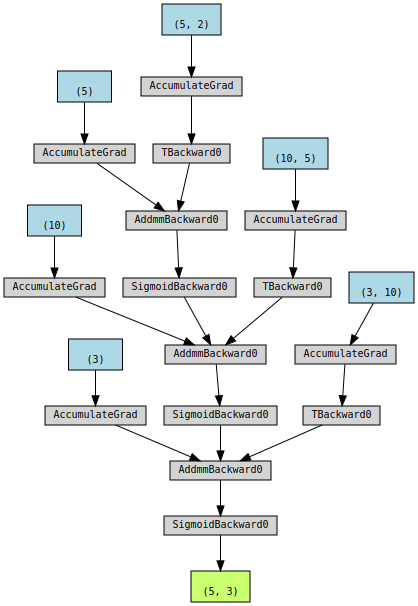

In [ ]:
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.Linear = nn.Sequential(nn.Linear(2,5),
                                nn.Sigmoid(),
                                nn.Linear(5,10),
                                nn.Sigmoid(),
                                nn.Linear(10,3),
                                nn.Sigmoid())

  def forward(self,x):
    x = self.Linear(x)
    return x

model2 = MyModel()
x = torch.randn(5,2)
y = model2(x) # model.forward(x)

print(y)

make_dot(model(x))

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.7037,  0.6789],
         [ 0.6319, -0.2958],
         [ 0.5135,  0.5106],
         [-0.1316, -0.0482],
         [ 0.4776, -0.0254]], requires_grad=True),
 Parameter containing:
 tensor([-0.6398,  0.4931,  0.1742,  0.2147, -0.5846], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3768, -0.1961,  0.1961,  0.4216, -0.2679],
         [ 0.1036, -0.2632,  0.4039,  0.3171, -0.2660],
         [-0.2360,  0.0099, -0.0156,  0.0919, -0.3139],
         [-0.2125, -0.1150,  0.0032,  0.3946, -0.3965],
         [ 0.3947,  0.3520,  0.0570,  0.0088,  0.2522],
         [ 0.3994, -0.0115,  0.0331, -0.1242,  0.2574],
         [ 0.1922,  0.0868,  0.0384, -0.4232, -0.2748],
         [ 0.0424,  0.0023, -0.0323,  0.1270, -0.2993],
         [-0.1148,  0.4084, -0.2565, -0.3339, -0.2810],
         [-0.0508,  0.1740,  0.3914,  0.0670,  0.4040]], requires_grad=True),
 Parameter containing:
 tensor([-0.3119,  0.1168,  0.4000,  0.3479, -0.0534,  0.2580, -0.0054,  0.1058,
  

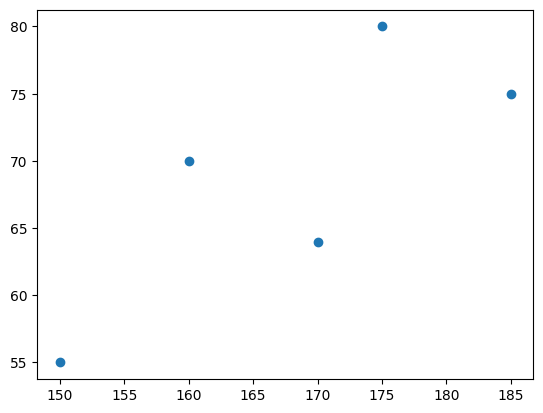

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([150,160,170,175,185])
y = torch.tensor([55,70,64,80,75])
N = len(x)
plt.plot(x,y,'o')

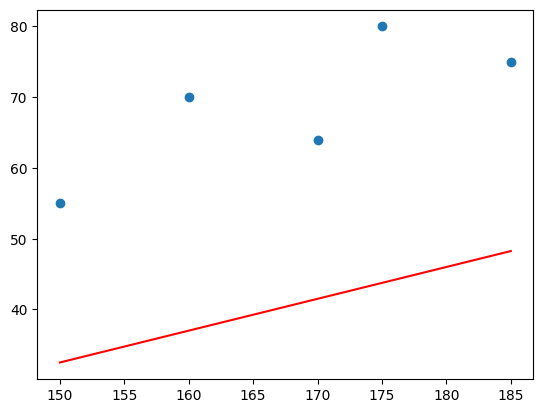

In [ ]:
#초깃값 설정

a = 0.45
b = -35
x_plot = torch.tensor([150,160,170,175,185])
y_plot = a * x_plot +b
plt.plot(x,y, 'o')
plt.plot(x_plot,y_plot,'r')

tensor(29.4230)
tensor(0.6176) tensor(-34.9990)


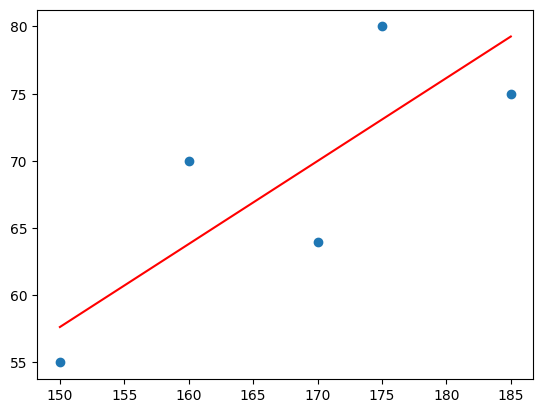

In [ ]:
#선형회귀 구현
x = torch.tensor([150,160,170,175,185])
y = torch.tensor([55,70,64,80,75])
N = len(x)

a = 0.45
b = -35
x_plot = torch.tensor([150,160,170,175,185])
y_plot = a * x_plot +b

for i in range(100):
  y_plot = a * x_plot +b
  loss = (1/N) * torch.sum((y - y_plot)**2)
  a_gd = (-2/N) * torch.sum(x_plot * (y- (a * x_plot + b)))
  b_gd = (-2/N) * torch.sum(y - y_plot)

  a -= (0.00001 * a_gd)
  b -= (0.00001 * b_gd)

print(loss)
print(a,b)
plt.plot(x,y, 'o')
plt.plot(x_plot,y_plot,'r')

Epoch: 1, tranin loss: 826.2250
Weight: 0.4785, Bais: -34.9998


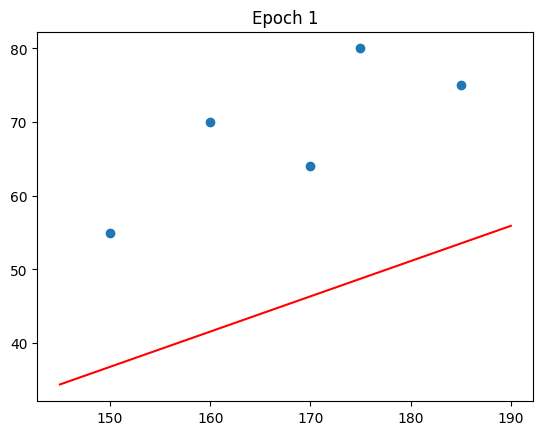

Epoch: 2, tranin loss: 578.0414
Weight: 0.5022, Bais: -34.9997


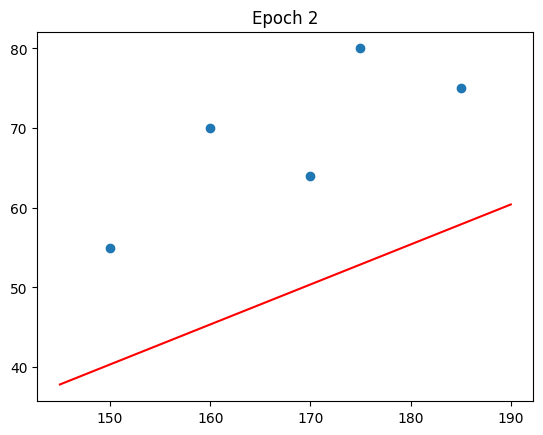

Epoch: 3, tranin loss: 407.1602
Weight: 0.5218, Bais: -34.9996


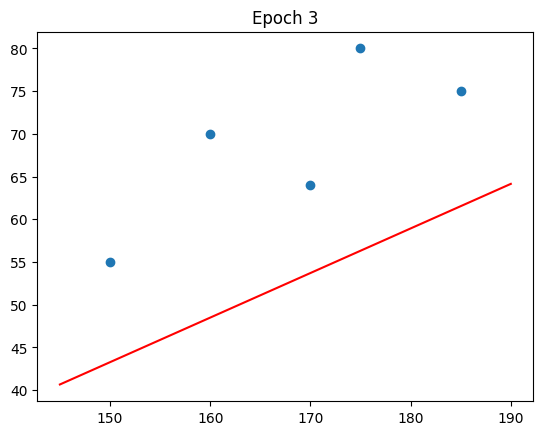

Epoch: 4, tranin loss: 289.5042
Weight: 0.5381, Bais: -34.9995


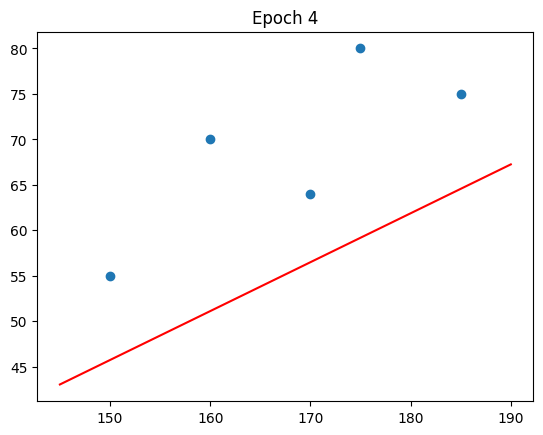

Epoch: 5, tranin loss: 208.4954
Weight: 0.5517, Bais: -34.9994


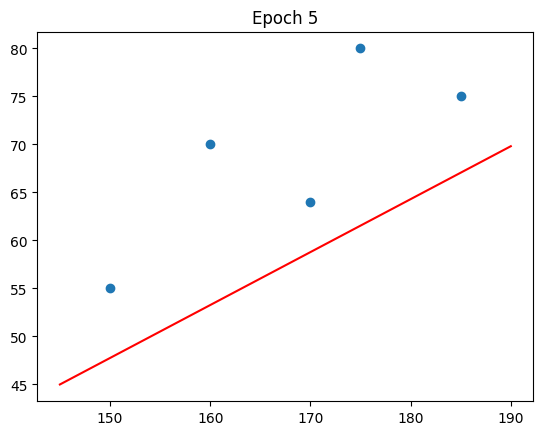

Epoch: 6, tranin loss: 152.7187
Weight: 0.5629, Bais: -34.9993


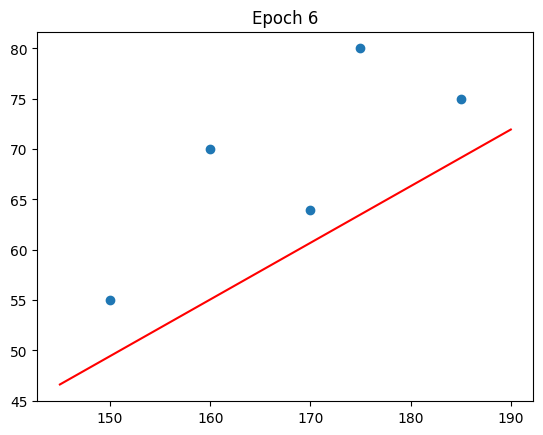

Epoch: 7, tranin loss: 114.3153
Weight: 0.5722, Bais: -34.9993


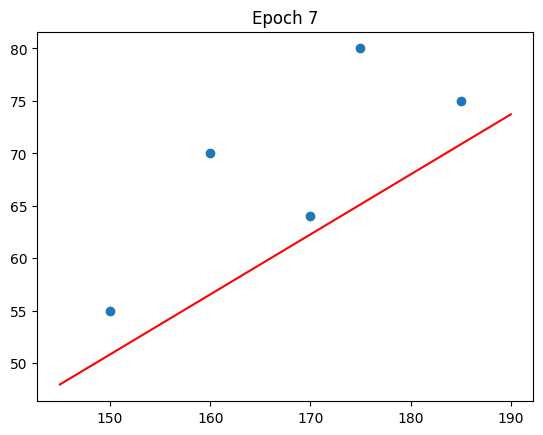

Epoch: 8, tranin loss: 87.8735
Weight: 0.5799, Bais: -34.9992


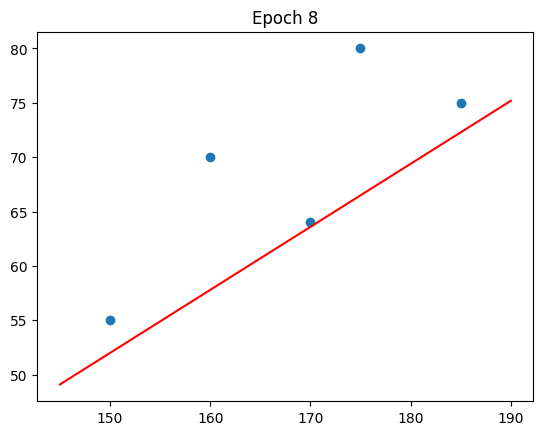

Epoch: 9, tranin loss: 69.6676
Weight: 0.5863, Bais: -34.9992


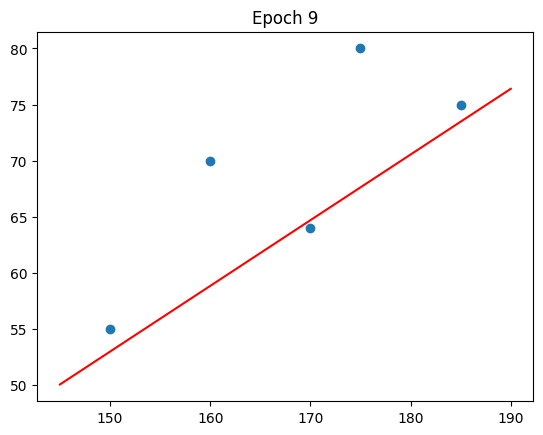

Epoch: 10, tranin loss: 57.1324
Weight: 0.5917, Bais: -34.9992


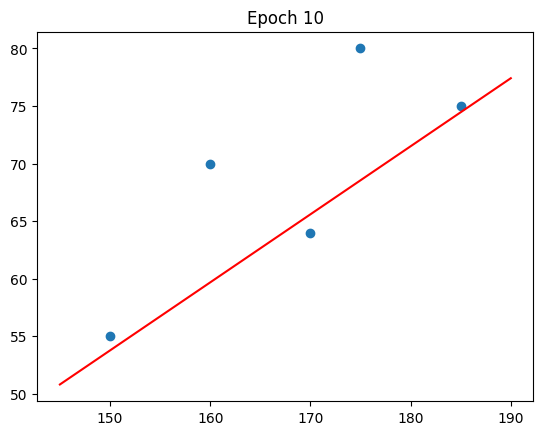

Epoch: 11, tranin loss: 48.5017
Weight: 0.5961, Bais: -34.9991


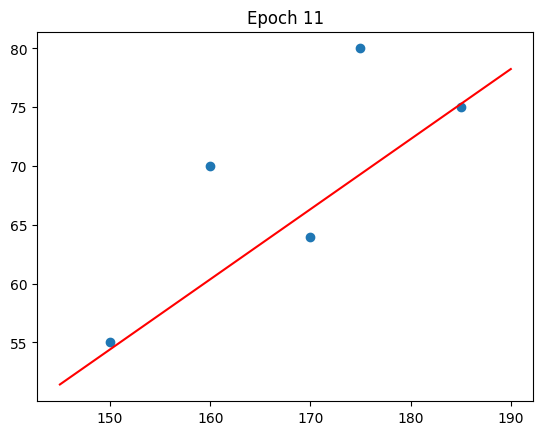

Epoch: 12, tranin loss: 42.5591
Weight: 0.5997, Bais: -34.9991


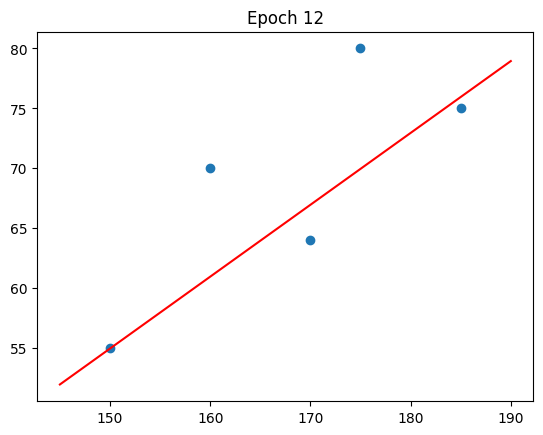

Epoch: 13, tranin loss: 38.4676
Weight: 0.6028, Bais: -34.9991


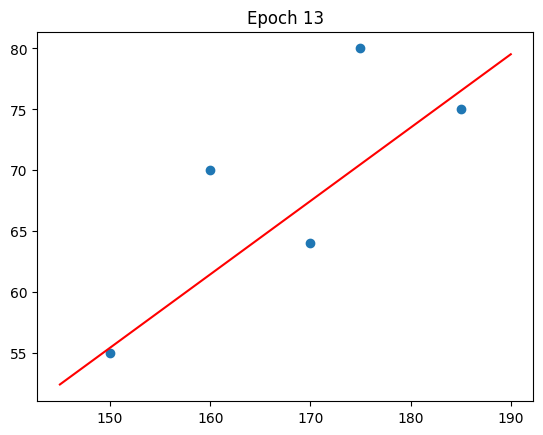

Epoch: 14, tranin loss: 35.6504
Weight: 0.6053, Bais: -34.9991


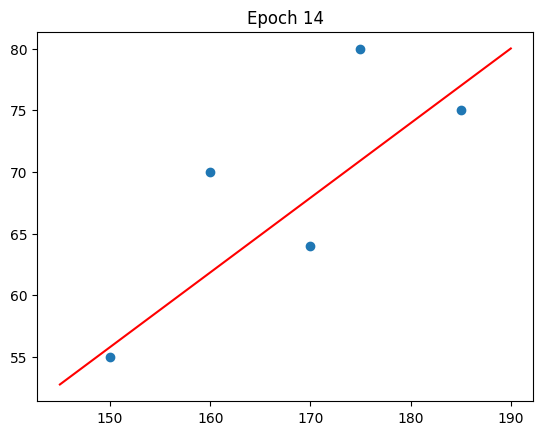

Epoch: 15, tranin loss: 33.7107
Weight: 0.6074, Bais: -34.9991


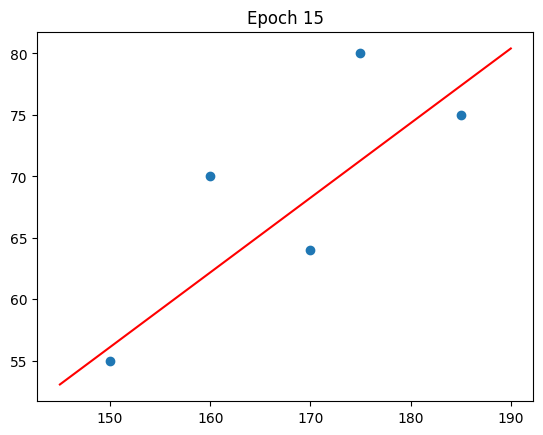

Epoch: 16, tranin loss: 32.3752
Weight: 0.6091, Bais: -34.9991


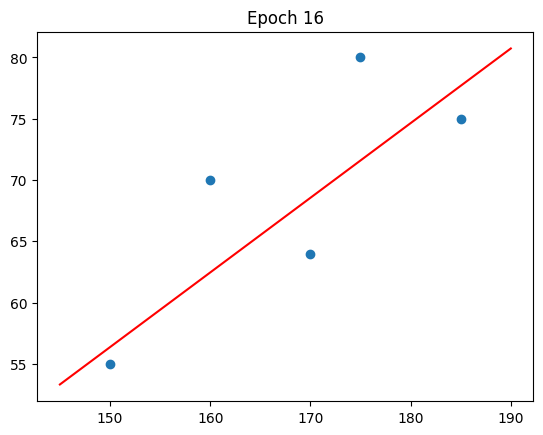

Epoch: 17, tranin loss: 31.4557
Weight: 0.6106, Bais: -34.9990


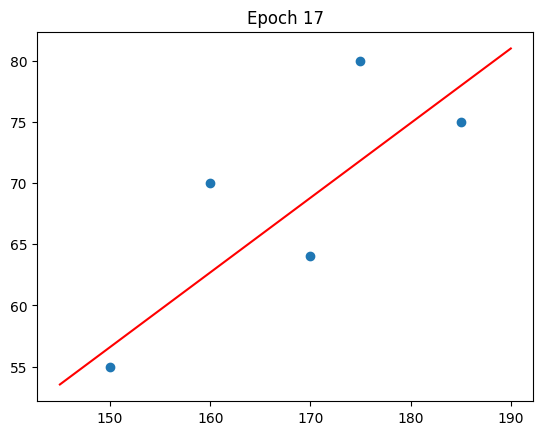

Epoch: 18, tranin loss: 30.8226
Weight: 0.6118, Bais: -34.9990


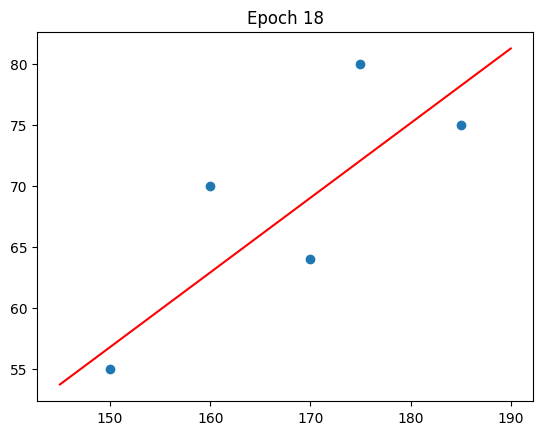

Epoch: 19, tranin loss: 30.3866
Weight: 0.6127, Bais: -34.9990


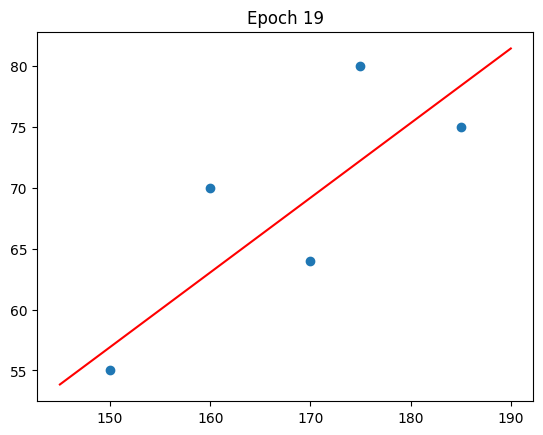

Epoch: 20, tranin loss: 30.0865
Weight: 0.6136, Bais: -34.9990


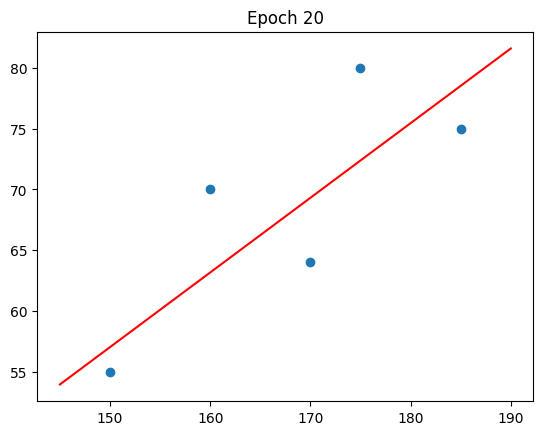

In [ ]:
#파이토치 구현

#모델 파라미터 초기화화
a = torch.tensor([0.45], requires_grad= True)
b = torch.tensor([-35.],requires_grad=True)

#하이퍼 파라미터 설정
LR = 3e-6
EPOCH = 20

loss_history = []

for ep in range(EPOCH):
  #inference 추론
  y_hat = a * x + b
  #loss
  loss = 0
  for n in range(N):
    loss += (y[n]- y_hat[n])**2
  loss = loss / N #mse
  #update
  loss.backward() # reuqirs_grad = true 모든 변수들 미분함 = a,b
  with torch.no_grad():
    a -= LR * a.grad
    b -= LR * b.grad
  a.grad = torch.tensor([0.]) #gd 초기화
  b.grad = torch.tensor([0.]) #gd 초기화

  #print loss
  loss_history += [loss.item()]
  print(f"Epoch: {ep+1}, tranin loss: {loss.item():.4f}")
  #print weight and bais
  print(f"Weight: {a.item():.4f}, Bais: {b.item():.4f}")

  x_plot = torch.linspace(145,190,100)
  y_plot = a.detach() * x_plot + b.detach() #detach clone이랑 비슷한데 grad = False로

  plt.figure()
  plt.plot(x,y,'o')
  plt.plot(x_plot,y_plot,'r')
  plt.title(f'Epoch {ep+1}')
  plt.show()

In [ ]:
# gd 초기화 필요한이유
z = torch.tensor([1.],requires_grad=True)

for _ in range(2):
  loss = z**2
  loss.backward()
  print(z.grad)
  z.grad = torch.tensor([0.])
  print(z.grad)

tensor([2.])
tensor([0.])
tensor([2.])
tensor([0.])


Text(0.5, 1.0, 'Training loss')

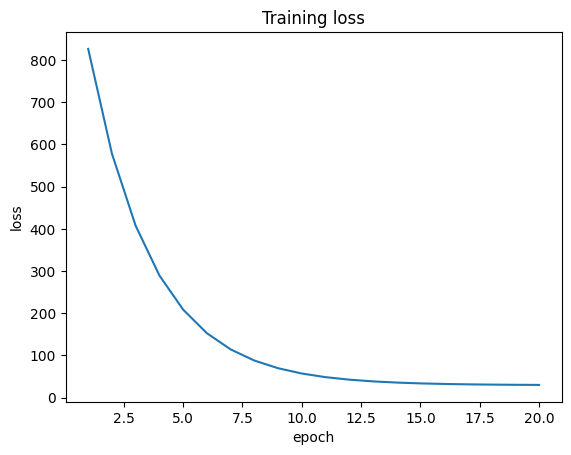

In [ ]:
#loss history
plt.plot(range(1,EPOCH +1),loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss')

Epoch: 1, tranin loss: 900.5650
Weight: 0.6136, Bais: -34.9990


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


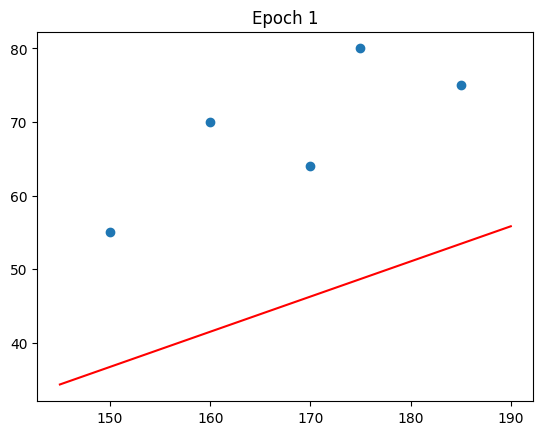

Epoch: 2, tranin loss: 660.9294
Weight: 0.6136, Bais: -34.9990


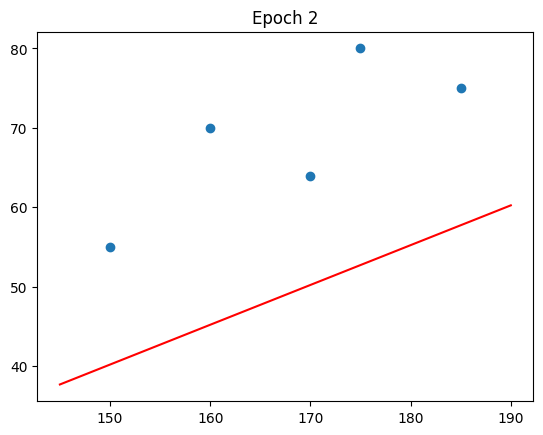

Epoch: 3, tranin loss: 495.9343
Weight: 0.6136, Bais: -34.9990


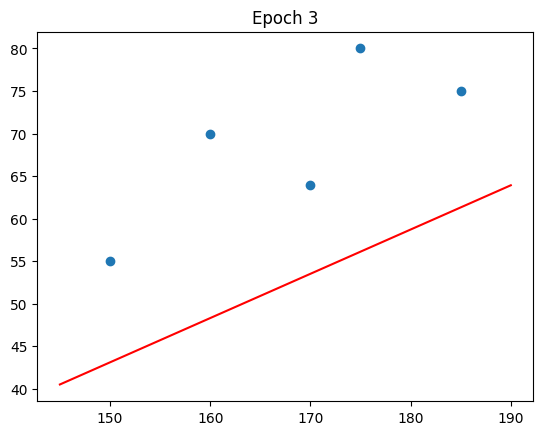

Epoch: 4, tranin loss: 382.3307
Weight: 0.6136, Bais: -34.9990


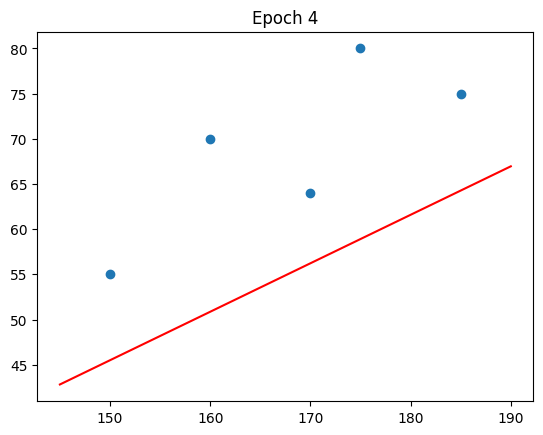

Epoch: 5, tranin loss: 304.1121
Weight: 0.6136, Bais: -34.9990


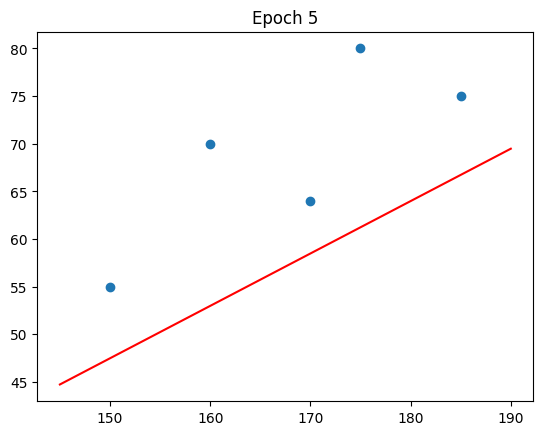

Epoch: 6, tranin loss: 250.2566
Weight: 0.6136, Bais: -34.9990


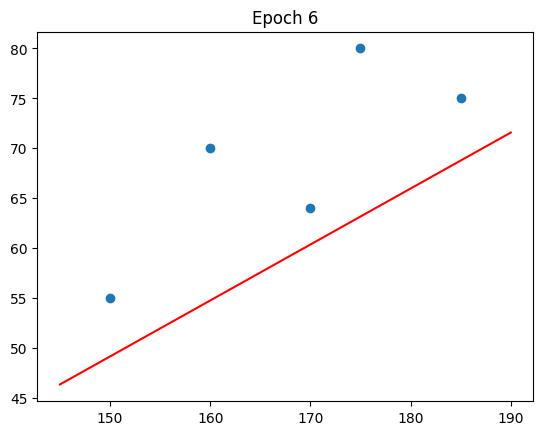

Epoch: 7, tranin loss: 213.1756
Weight: 0.6136, Bais: -34.9990


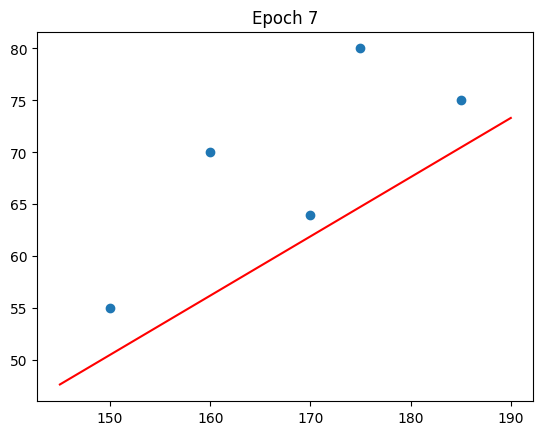

Epoch: 8, tranin loss: 187.6445
Weight: 0.6136, Bais: -34.9990


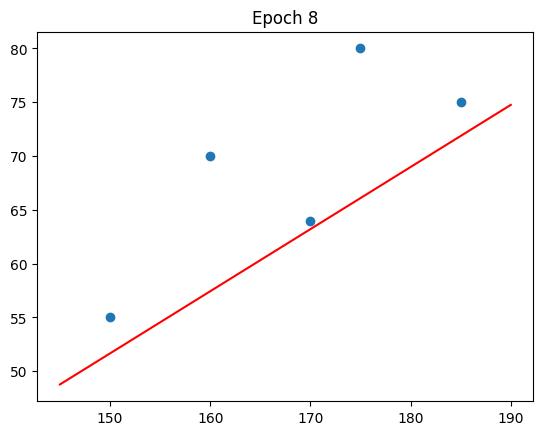

Epoch: 9, tranin loss: 170.0657
Weight: 0.6136, Bais: -34.9990


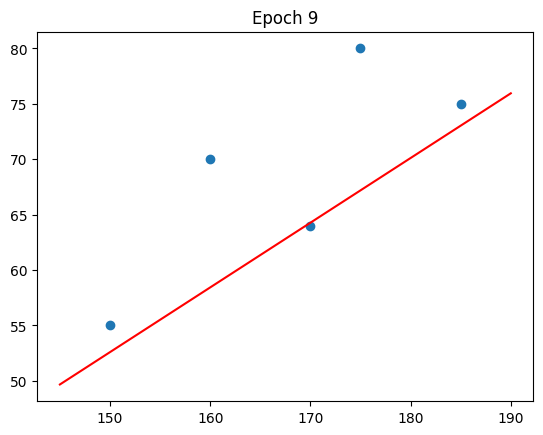

Epoch: 10, tranin loss: 157.9622
Weight: 0.6136, Bais: -34.9990


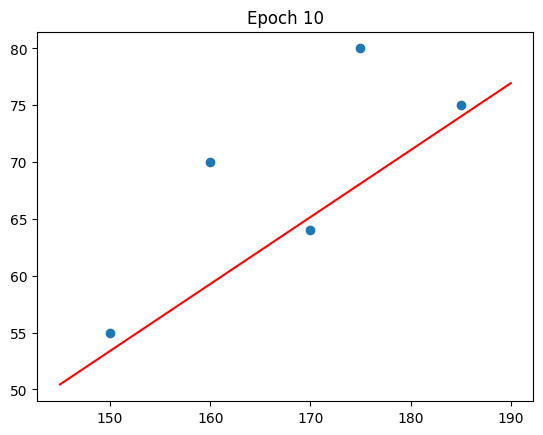

Epoch: 11, tranin loss: 149.6288
Weight: 0.6136, Bais: -34.9990


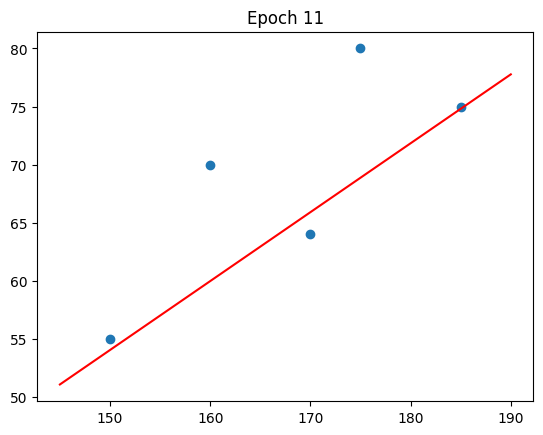

Epoch: 12, tranin loss: 143.8909
Weight: 0.6136, Bais: -34.9990


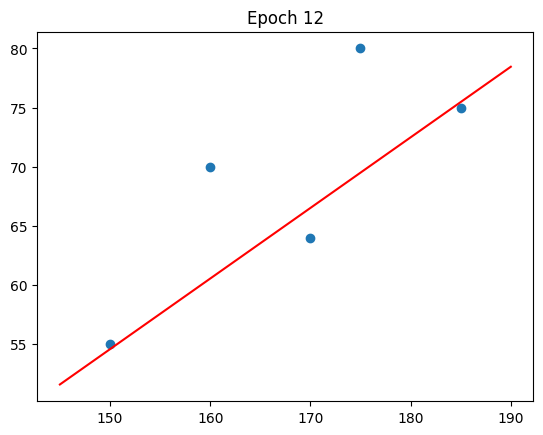

Epoch: 13, tranin loss: 139.9402
Weight: 0.6136, Bais: -34.9990


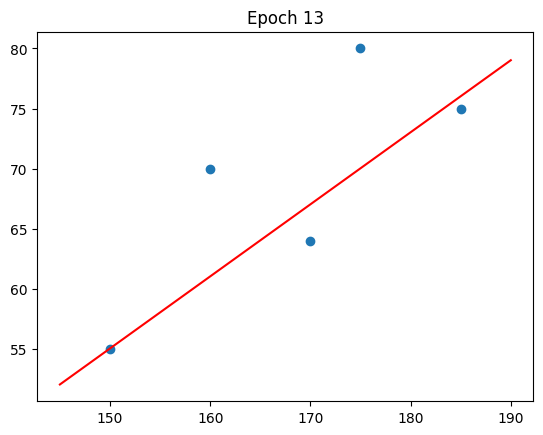

Epoch: 14, tranin loss: 137.2202
Weight: 0.6136, Bais: -34.9990


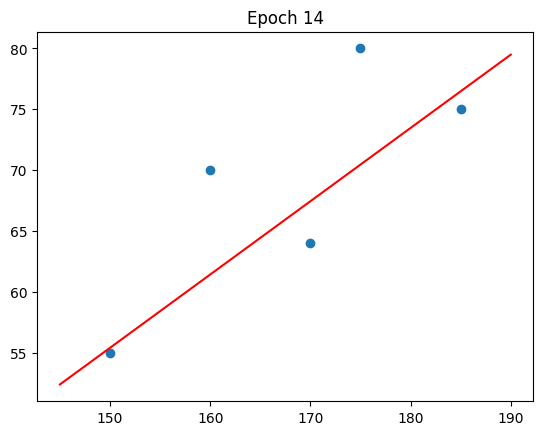

Epoch: 15, tranin loss: 135.3472
Weight: 0.6136, Bais: -34.9990


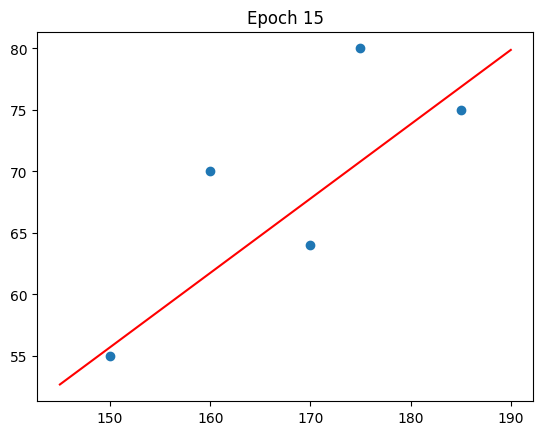

Epoch: 16, tranin loss: 134.0578
Weight: 0.6136, Bais: -34.9990


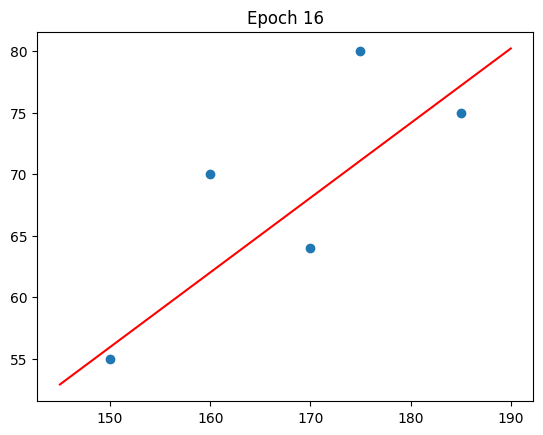

Epoch: 17, tranin loss: 133.1698
Weight: 0.6136, Bais: -34.9990


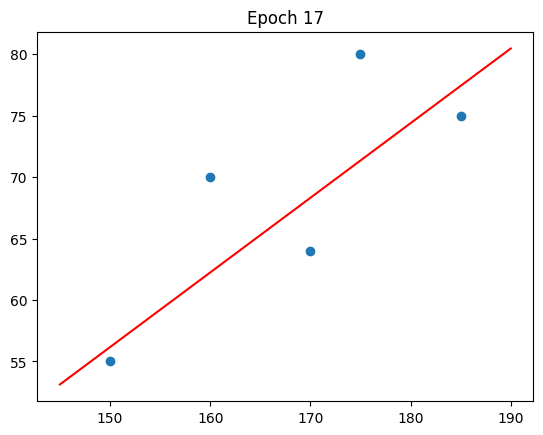

Epoch: 18, tranin loss: 132.5586
Weight: 0.6136, Bais: -34.9990


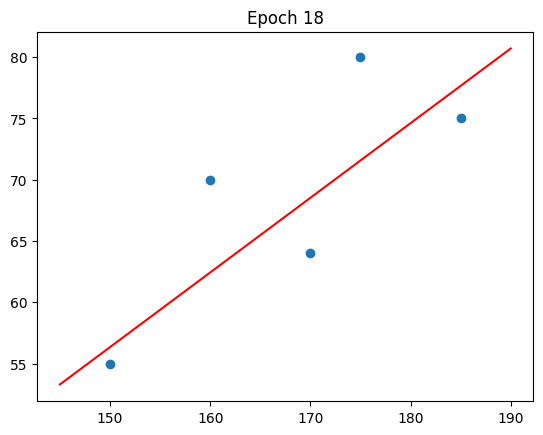

Epoch: 19, tranin loss: 132.1376
Weight: 0.6136, Bais: -34.9990


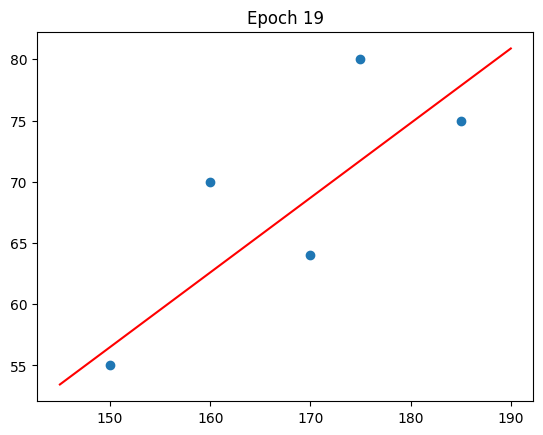

Epoch: 20, tranin loss: 131.8478
Weight: 0.6136, Bais: -34.9990


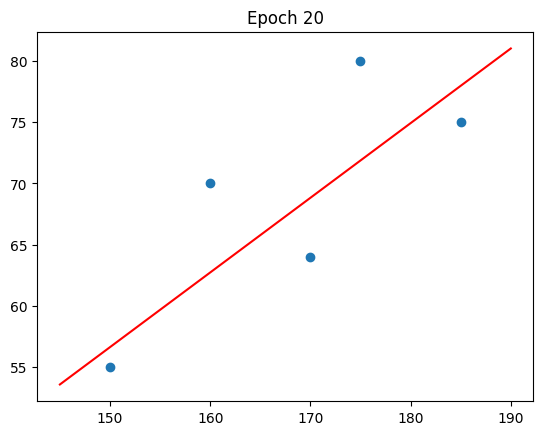

In [ ]:
#토치의 정석

from torch import nn, optim
x = x.float()
y = y.float()
x = x.reshape(-1,1)
model = nn.Linear(1,1)
model.weight.data = torch.tensor([[0.45]])
model.bias.data = torch.tensor([-35.])

LR = 3e-6
EPOCH = 20
optimizer = optim.SGD(model.parameters(), lr = LR)
criterion = nn.MSELoss()

loss_history = []

for ep in range(EPOCH):
  #inference
  y_hat = model(x)
  #loss
  loss = criterion(y_hat,y)
  #update
  optimizer.zero_grad() #gd 누적 막기위한ㅊ ㅗ기화
  loss.backward()
  optimizer.step()

  #print loss
  loss_history += [loss.item()]
  print(f"Epoch: {ep+1}, tranin loss: {loss.item():.4f}")
  #print weight and bais
  print(f"Weight: {a.item():.4f}, Bais: {b.item():.4f}")

  x_plot = torch.linspace(145,190,100)
  y_plot = model.weight.squeeze().detach() * x_plot + model.bias.squeeze().detach()
  #squeeze = 1인 차원 제거함 # 1,1모양이면 이상하니까 스칼라 값으로 바꿈
  plt.figure()
  plt.plot(x,y,'o')
  plt.plot(x_plot,y_plot,'r')
  plt.title(f'Epoch {ep+1}')
  plt.show()

